# Ajuste de curvas

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/a/a8/Regression_pic_assymetrique.gif" width="400px" height="125px" />

> El **ajuste de curvas** es el proceso de construir una curva (función), que sea el mejor ajuste a una serie de puntos. Las curvas ajustadas pueden ser usadas como asistencia en la visualización de datos, para inferir valores de una función donde no hay datos disponibles, y para resumir la relación entre variables.

**Referencia**:
- https://en.wikipedia.org/wiki/Curve_fitting
___

## 0. Introducción

Consideremos un polinomio de grado uno:

$$y = \beta_1 x + \beta_0.$$

Esta es una **línea recta** que tiene pendiente $\beta_1$. Sabemos que habrá una línea conectando dos puntos cualesquiera. Por tanto, *una ecuación polinómica de primer grado es un ajuste perfecto entre dos puntos*.

Si consideramos ahora un polinomio de segundo grado,

$$y = \beta_2 x^2 + \beta_1 x + \beta_0,$$

este se ajustará exactamente a tres puntos. Si aumentamos el grado de la función a la de un polinomio de tercer grado, obtenemos:

$$y = \beta_3 x^3 + \beta_2 x^2 + \beta_1 x + \beta_0,$$

que se ajustará a cuatro puntos.

**Ejemplos**
1. Encontrar la línea recta que pasa exactamente por los puntos $(3,1)$ y $(2,0)$.
2. Encontrar la parábola que pasa exactamente por los puntos $(0,1)$, $(1,0)$ y $(2,1)$.

**Solución**
1. Consideramos $y=\beta_1 x + \beta_0$. Evaluando en el punto $(3,1)$, obtenemos $\beta_1(3) + \beta_0 = 1$. Ahora, evaluando en el punto $(2,0)$, obtenemos $\beta_1(2) + \beta_0 = 0$. De esta manera,
$$\left[\begin{array}{cc} 1 & 3 \\ 1 & 2\end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1\end{array}\right]=\left[\begin{array}{c} 1 \\ 0\end{array}\right].$$
Resolviendo, $\beta_0=-2, \, \beta_1=1$.

In [1]:
import numpy as np

In [2]:
b=np.array([1,0])
A=np.array([[3,1],[2,1]])

# Inversa de 'A'
np.linalg.inv(A)@b  # @  ->  multiplicación matricial

array([ 1., -2.])

2. Consideramos $y=\beta_2 x^2 + \beta_1 x + \beta_0$. Evaluando en el punto $(0,1)$, obtenemos $\beta_2(0)^2 + \beta_1(0) + \beta_0 = 1$. Ahora, evaluando en el punto $(1,0)$, obtenemos $\beta_2(1)^2 + \beta_1(1) + \beta_0 = 0$. Finalmente, evaluando en el punto $(2,1)$, obtenemos $\beta_2(2)^2 + \beta_1(2) + \beta_0 = 1$. De esta manera,
$$\left[\begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 1 \\ 1 & 2 & 4 \end{array}\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \\ \beta_2 \end{array}\right]=\left[\begin{array}{c} 1 \\ 0 \\ 1 \end{array}\right].$$
Resolviendo, $\beta_0=1, \, \beta_1=-2$ y $\beta_2=1$.

In [3]:
b=np.array([1,0,1])
A=np.array([[0,0,1],[1,1,1],[4,2,1]])

# Inversa de 'A'
np.linalg.inv(A)@b

array([ 1., -2.,  1.])

### ¿Qué tienen en común los anteriores problemas?
Las curvas están completamente determinadas por los puntos (datos limpios, suficientes y necesarios).

Esto se traduce en que, al llevar el problema a un sistema de ecuaciones lineales, existe una única solución: **no hay necesidad, ni se puede optimizar nada**.

¿Tendremos datos así de **'*bonitos*'** en la vida real?

La realidad es que los datos que encontraremos en nuestra vida profesional se parecen más a esto...

### ¿Cómo ajustamos una curva a esto?

## 1. Problema básico

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/3/3a/Linear_regression.svg" width="400px" height="125px" />

Consideramos que tenemos un conjunto de n pares ordenados de datos $(x_i,y_i)$, para $i=1,2,3,\dots,n$.

### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(x) = \beta_0+\beta_1 x = \left[1 \quad x\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad x\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^\top$, de forma que la función evaluada en los puntos $x_i$ i.e.($\hat{f}(x_i)$) aproxime los valores correspondientes $y_i$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2=\sum_{i=1}^{n}(y_i-\left[1 \quad x_i\right]\boldsymbol{\beta})^2=\left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2,$$

donde $\boldsymbol{y}=\left[y_1,\quad\cdots\quad, y_n\right]^\top$, y $\boldsymbol{X}=\left[\begin{array}{ccc}1 & x_1\\ \vdots & \vdots \\ 1 & x_n\end{array}\right].$ Esto es,

$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2$$

In [4]:
import matplotlib.pyplot as plt

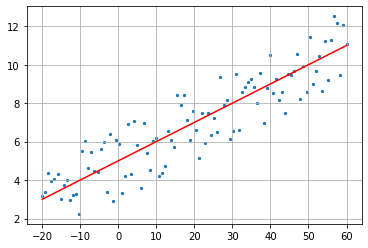

In [13]:
x=np.linspace(-20,60,100)
y=5+0.1*x+4*np.random.rand(100)-2
plt.scatter(x,y,s=5)
plt.plot(x,5+0.1*x,'r')
plt.grid()

In [14]:
import scipy.optimize as opt

In [15]:
opt.minimize?

In [16]:
# Mínimos cuadrados
def fun(beta,x,y):
    f=beta[0]+beta[1]*x     # Función lineal
    return np.sum((y-f)**2)

In [17]:
beta0=np.random.rand(2) # Es de dimensión 2 porque necesitamos beta[0] y beta[1]
sol=opt.minimize(fun,beta0,args=(x,y))
sol

      fun: 122.4524385911593
 hess_inv: array([[ 3.09123134e-03, -7.05323802e-05],
       [-7.05323802e-05,  6.95049459e-06]])
      jac: array([-2.47955322e-05,  1.20162964e-04])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 138
      nit: 3
     njev: 42
   status: 2
  success: False
        x: array([5.05596319, 0.09499881])

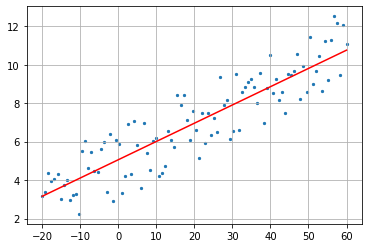

In [18]:
# sol.x  ->  beta óptimo.
# sol.x[0] -> beta[0] óptimo y sol.x[1] -> beta[1] óptimo.
f=sol.x[0]+sol.x[1]*x
plt.plot(x,f,'r')
plt.scatter(x,y,s=5)
plt.grid()

## 2. Ajuste polinomial

Ahora, considere el siguiente conjunto de datos...

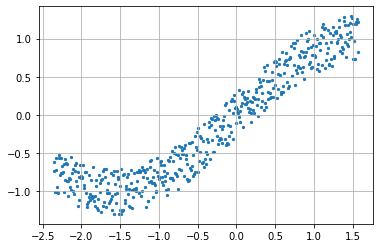

In [21]:
x=np.linspace(-np.pi*3/4,np.pi/2,500)
y=np.sin(x)+0.6*np.random.rand(500)-0.3
plt.scatter(x,y,s=5)
plt.grid()

In [22]:
# Regresión lineal
fun1=fun                                  # mínimos cuadrados
beta0=np.random.rand(2)
sol1=opt.minimize(fun1,beta0,args=(x,y))
sol1.x

array([0.07308789, 0.61170881])

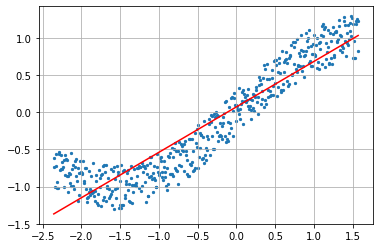

In [24]:
f1=sol1.x[0]+sol1.x[1]*x
plt.plot(x,f1,'r')
plt.scatter(x,y,s=5)
plt.grid()

In [25]:
# Sumatoria de las diferencias al cuadrado
sol1.fun

37.329695069548706

---

In [26]:
def fun2(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2  # función cuadrática
    return np.sum((y-f)**2)

In [27]:
beta0=np.random.rand(3)
sol2=opt.minimize(fun2,beta0,args=(x,y))
sol2.x

array([-0.08936908,  0.7240227 ,  0.1430025 ])

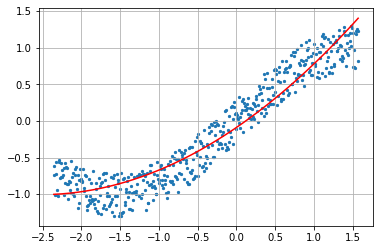

In [28]:
f2=sol2.x[0]+sol2.x[1]*x+sol2.x[2]*x**2
plt.plot(x,f2,'r')
plt.scatter(x,y,s=5)
plt.grid()

In [29]:
# Sumatoria de las diferencias al cuadrado
sol2.fun

23.712316352360567

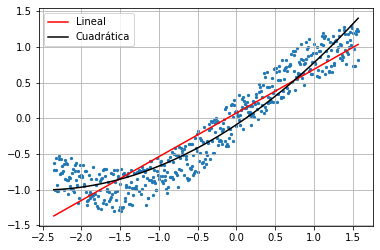

In [30]:
plt.scatter(x,y,s=5)
plt.plot(x,f1,'r',label='Lineal')
plt.plot(x,f2,'k',label='Cuadrática')
plt.legend(loc='best') # Mostar etiquetas
plt.grid()

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

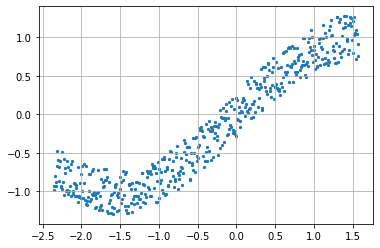

In [3]:
# Definimos el conjunto de puntos que queremos ajustar
x=np.linspace(-np.pi*3/4,np.pi/2,500)
y=np.sin(x)+0.6*np.random.rand(500)-0.3

plt.scatter(x,y,s=5)
plt.grid()

In [4]:
opt.minimize?

In [5]:
# Mínimos cuadrados para un polinomio cúbico
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y-f)**2)

In [6]:
beta0=np.random.rand(4)
sol3=opt.minimize(fun,beta0,args=(x,y))
sol3

      fun: 14.825958327354053
 hess_inv: array([[ 0.00263553,  0.00082905, -0.00160977, -0.00064235],
       [ 0.00082905,  0.00384763, -0.00106321, -0.00140306],
       [-0.00160977, -0.00106321,  0.00179792,  0.00088877],
       [-0.00064235, -0.00140306,  0.00088877,  0.00075441]])
      jac: array([0.00000000e+00, 1.31130219e-06, 7.15255737e-07, 1.90734863e-06])
  message: 'Optimization terminated successfully.'
     nfev: 55
      nit: 6
     njev: 11
   status: 0
  success: True
        x: array([ 0.00437288,  0.95117032, -0.00866939, -0.12064696])

In [7]:
sol3.x

array([ 0.00437288,  0.95117032, -0.00866939, -0.12064696])

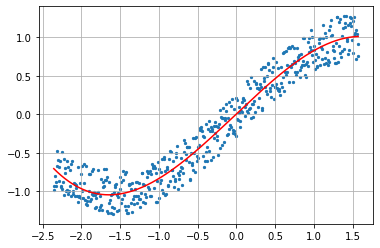

In [8]:
plt.scatter(x,y,s=5)
f=sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f,'r')
plt.grid()

---

In [9]:
n=5
for i in range(n+1):
    # x**i
    print(i)

0
1
2
3
4
5


In [10]:
def f(beta,x,n):
    X=[x**i for i in range(n+1)] # [x**0, x**1, x**2, ..., x**n]
    return np.dot(beta,X) # Producto punto

In [11]:
def fun(beta,x,y,n):
    return np.sum((y-f(beta,x,n))**2)

In [12]:
# Polinomio de grado 4
n=4
beta0=np.random.rand(n+1)
sol4=opt.minimize(fun,beta0,args=(x,y,n))

# Polinomio de grado 5
n=5
beta0=np.random.rand(n+1)
sol5=opt.minimize(fun,beta0,args=(x,y,n))

In [13]:
sol4.fun,sol5.fun

(14.825468762280103, 14.732534979976059)

---

In [14]:
G=5 # Máximo grado de polinomios
sol=[0,0,0,0,0] # np.zeros(G)
for n in range(1,G+1):
    beta0=np.random.rand(n+1)
    sol[n-1]=opt.minimize(fun,beta0,args=(x,y,n))

In [16]:
sol[0].fun,sol[1].fun,sol[2].fun

(36.33448281254026, 24.473036641772566, 14.825958327348438)

In [17]:
sol[2].fun,sol[3].fun,sol[4].fun

(14.825958327348438, 14.825468762280407, 14.732534982740743)

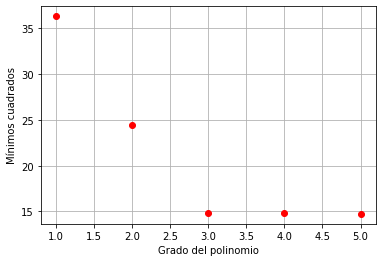

In [18]:
for i in range(G):
    plt.plot(i+1,sol[i].fun,'or')
plt.xlabel('Grado del polinomio')
plt.ylabel('Mínimos cuadrados')
plt.grid()

In [19]:
sol[2].x

array([ 0.00437285,  0.95117022, -0.00866929, -0.12064689])

In [20]:
sol[3].x

array([ 5.06283785e-03,  9.49122534e-01, -1.07422591e-02, -1.19286001e-01,
        8.66413098e-04])

In [21]:
sol[4].x

array([ 0.01894988,  0.96961259, -0.06462696, -0.15260676,  0.02458302,
        0.01207877])

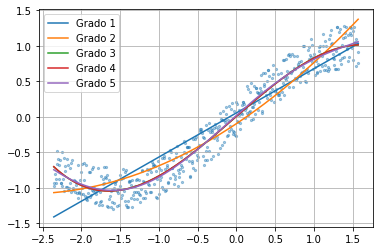

In [26]:
for i in range(G):
    plt.plot(x,f(sol[i].x,x,i+1),label='Grado '+str(i+1)) # str -> convierte a cadena de texto (string)
plt.scatter(x,y,s=5,alpha=0.4)
plt.legend(loc='best')
plt.grid()

## 3. Regularización

Vimos que la solución de mínimos cuadrados es:
$$\boldsymbol{\beta}^{ls} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2.$$

Sin embargo, si crecemos el orden del modelo hay overfitting y algunos coeficientes óptimos $\boldsymbol{\beta}$ crecen muchísimo. Que un coeficiente sea muy grande, significa que se le da mucha importancia a alguna característica (que quizá sea ruido... no sirve para predecir).

La regularización consiste en penalizar la magnitud de los coeficientes $\boldsymbol{\beta}$ en el problema de optimización, para que no crezcan tanto. 

### 3.1. Ridge

$$\boldsymbol{\beta}^{ridge} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|^2$$

In [28]:
def ridge(beta,x,y,n,l):
    return np.sum((y-f(beta,x,n))**2)+l*np.dot(beta,beta)

In [42]:
n=3
beta0=np.random.rand(n+1)
solR=opt.minimize(ridge,beta0,args=(x,y,n,50))
solR

      fun: 47.791535564602
 hess_inv: array([[ 0.00191085,  0.00036878, -0.00104422, -0.00034875],
       [ 0.00036878,  0.00262378, -0.00054698, -0.0008951 ],
       [-0.00104422, -0.00054698,  0.001288  ,  0.00058625],
       [-0.00034875, -0.0008951 ,  0.00058625,  0.00051543]])
      jac: array([9.53674316e-07, 9.53674316e-07, 9.53674316e-07, 4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 60
      nit: 7
     njev: 12
   status: 0
  success: True
        x: array([-0.03665309,  0.69016963,  0.05200401, -0.02862891])

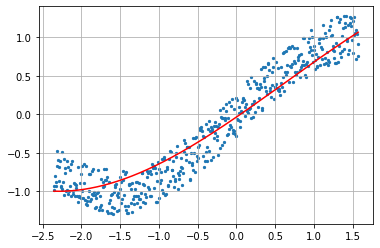

In [43]:
plt.scatter(x,y,s=5)
plt.plot(x,f(solR.x,x,n),'r')
plt.grid()

### 3.2. Lasso

$$\boldsymbol{\beta}^{lasso} = \arg \min_{\boldsymbol{\beta}} \left|\left|\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\beta}\right|\right|^2 + \lambda\left|\left|\boldsymbol{\beta}\right|\right|_1$$

La norma 1 no es más que la suma de los valores absolutos de las componentes $\left|\left|\boldsymbol{\beta}\right|\right|_1=\sum_{j=0}^m\left|\beta_j\right|$.

In [44]:
def lasso(beta,x,y,n,l):
    return np.sum((y-f(beta,x,n))**2)+l*np.sum(np.abs(beta)) # np.abs -> valor absoluto

In [49]:
n=3
beta0=np.random.rand(n+1)
solL=opt.minimize(lasso,beta0,args=(x,y,n,50))
solL

      fun: 61.379876091413884
 hess_inv: array([[ 1.66525719e-10, -3.35263719e-10,  3.26394022e-07,
         1.39425846e-07],
       [-3.35263719e-10,  3.25683256e-08, -6.99188645e-07,
        -3.07227926e-07],
       [ 3.26394022e-07, -6.99188645e-07,  6.82026173e-03,
         2.91072463e-03],
       [ 1.39425846e-07, -3.07227926e-07,  2.91072463e-03,
         1.30594931e-03]])
      jac: array([1.25885010e-04, 4.76837158e-07, 4.76837158e-07, 0.00000000e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 447
      nit: 22
     njev: 87
   status: 2
  success: False
        x: array([-6.81214999e-09,  7.38244417e-01,  5.92986183e-03, -5.44600619e-02])

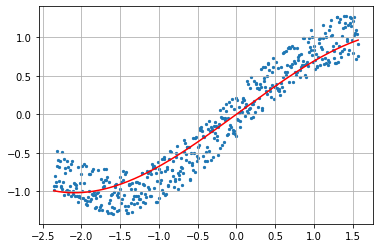

In [50]:
plt.scatter(x,y,s=5)
plt.plot(x,f(solL.x,x,n),'r')
plt.grid()